# 2.10 Assignment 2: Linear Regression and Gradient Descent

[Problem 1](#Problem-1)

[Problem 2](#Problem-2) 

### Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
!pip install xlrd

  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.9 MB/s eta 0:00:00


# Problem 1

## Part A 
Use a linear regression model to predict the number of customers each airline serves from its length of the flight and daily flight time per plane.

Report your model (linear equation).

What is your predicted value for the number of customers served for a flight that is 200 miles in length and has a daily flight time per plane of 7.2 hours? 

In [7]:
#set column names
column_names = ['airline', 'length_flight', 'plane_speed', 'daily_flight_time_pplane', 'pop_served', 
                'total_op_cost', 'revenue_tons_per_aircraft_mile', 'ton-mile_load_factor', 'capacity', 
                'total_assets', 'investments_special_funds', 'adjusted_assets']

#load data
airline_data = pd.read_csv('Assignment 2—Problem 1_ airline_costs.csv', header = None, names = column_names)
airline_data.head()

,airline,length_flight,plane_speed,daily_flight_time_pplane,pop_served,total_op_cost,revenue_tons_per_aircraft_mile,ton-mile_load_factor,capacity,total_assets,investments_special_funds,adjusted_assets
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [8]:
#check for missing values
airline_data.isnull().any()

airline                           False
length_flight                     False
plane_speed                       False
daily_flight_time_pplane          False
pop_served                        False
total_op_cost                     False
revenue_tons_per_aircraft_mile    False
ton-mile_load_factor              False
capacity                          False
total_assets                      False
investments_special_funds         False
adjusted_assets                   False
dtype: bool

In [9]:
#check data types
airline_data.dtypes

airline                            object
length_flight                       int64
plane_speed                         int64
daily_flight_time_pplane          float64
pop_served                          int64
total_op_cost                     float64
revenue_tons_per_aircraft_mile    float64
ton-mile_load_factor              float64
capacity                          float64
total_assets                      float64
investments_special_funds         float64
adjusted_assets                   float64
dtype: object

In [10]:
#check for unusual values
airline_data.describe()

,length_flight,plane_speed,daily_flight_time_pplane,pop_served,total_op_cost,revenue_tons_per_aircraft_mile,ton-mile_load_factor,capacity,total_assets,investments_special_funds,adjusted_assets
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,129.096774,161.258065,6.463226,14491.967742,113.506452,1.732258,0.476290,3.306806,215.310968,20.312581,194.998387
std,73.212638,26.851403,1.549586,16824.247836,142.704637,1.191852,0.139171,1.689303,402.655569,48.770618,357.849189
min,45.000000,116.000000,2.350000,183.000000,42.300000,0.070000,0.166000,0.422000,2.030000,0.010000,1.410000
25%,71.000000,141.500000,5.865000,2500.000000,50.800000,0.800000,0.399000,2.119500,13.230000,0.025000,13.220000
50%,100.000000,150.000000,6.600000,6500.000000,75.400000,1.190000,0.505000,2.405000,21.600000,2.110000,19.100000
75%,174.500000,181.500000,7.260000,19100.000000,120.750000,2.680000,0.568500,4.598000,167.310000,5.935000,159.810000
max,293.000000,216.000000,9.500000,56928.000000,820.900000,4.300000,0.689000,7.544000,1436.530000,187.840000,1271.310000


<Axes: >

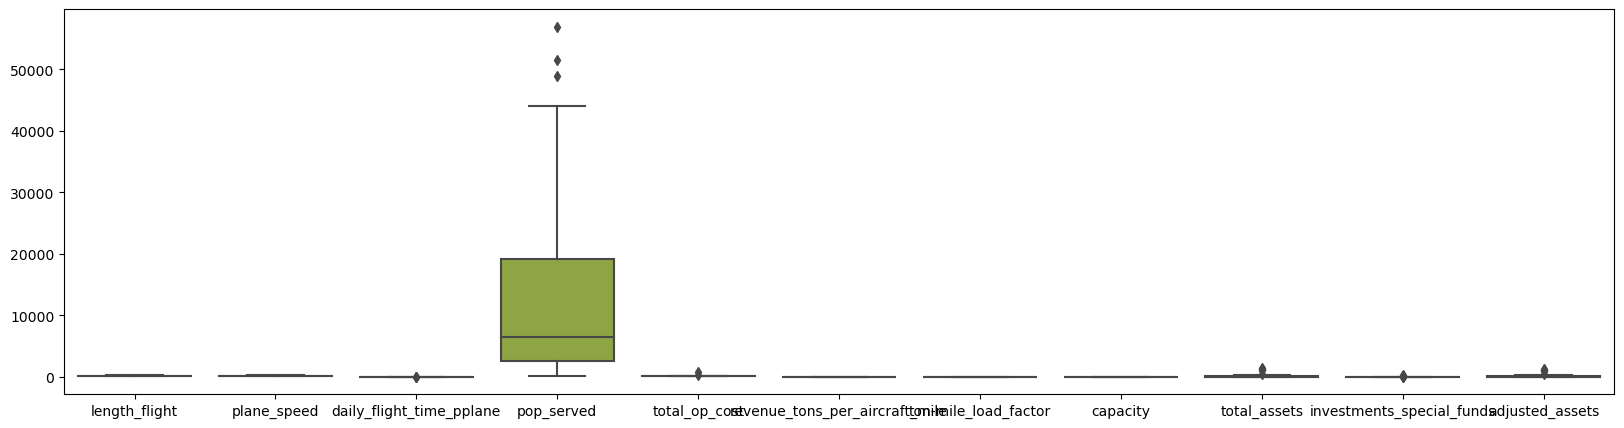

In [17]:
#plot distribution to look for outliers
plt.figure(figsize = (20,5))
sns.boxplot(data = airline_data)

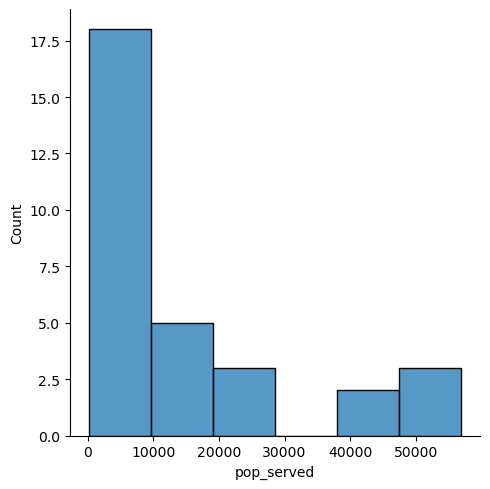

In [22]:
#examine variable with significant outliers
sns.displot(data = airline_data, x='pop_served')

In [21]:
airline_data['pop_served'].describe()

count       31.000000
mean     14491.967742
std      16824.247836
min        183.000000
25%       2500.000000
50%       6500.000000
75%      19100.000000
max      56928.000000
Name: pop_served, dtype: float64

In [41]:
#ended up not using transformed data
#transform pop_served values since data isn't normally distributed and outliers may affect model
#airline_data['pop_served_sqrt'] = np.sqrt(airline_data['pop_served'])
#airline_data.head()

In [40]:
#examine variable with significant outliers
#sns.displot(data = airline_data, x='pop_served_log')

In [32]:
#feature selection
X = airline_data[['length_flight', 'daily_flight_time_pplane']]
y = airline_data['pop_served']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

#train model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

#evaluate model, make predictions
y_pred = linreg_model.predict(X_test)
#calculate mean abs error and mean sq error as the outliers may cause the mse to penalize more heavily than mae
mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
r_sq = linreg_model.score(X_test, y_test)


print('mean absolute error:', mean_abs_error)
print('mean squared error:', mean_sq_error)
print('r squared:', r_sq)

mean absolute error: 6826.055317877811
mean squared error: 71583858.70850961
r squared: -1.449116272724876


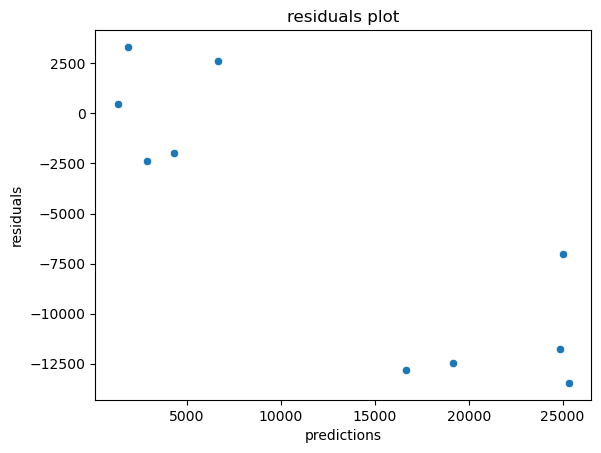

In [31]:
#plot residuals
linreg_residuals = y_test - y_pred
sns.scatterplot(x = y_pred, y = linreg_residuals)
plt.title('residuals plot')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

In [34]:
#print coefficients to write linear equation
print('coefficients:', linreg_model.coef_)

#print intercept too
print('intercept:', linreg_model.intercept_)

coefficients: [192.97263752 -53.50477332]
intercept: -8283.430070633887


model linear equation to report model: 

pop_served = (192.97263752) * length_flight + (-53.50477332) * daily_flight_time_pplane

In [39]:
#What is your predicted value for the number of customers served for a flight that is 200 miles in length 
#and has a daily flight time per plane of 7.2 hours?
predicted_value = (192.97263752 * 200) + (-53.50477332 * 7.2)
print('predicted number of customers for a 200 mile flight with a 7.2 hour duration:', round(predicted_value, 0))

predicted number of customers for a 200 mile flight with a 7.2 hour duration: 38209.0


## Part B
Next, build another regression model to predict the total assets of an airline from the customer served by the airline.

Once again, report your model.

What is your prediction for total assets for an airline, given they serve 20,300,000 customers? 

In [42]:
#new feature selection
X2 = airline_data[['pop_served']]
y2 = airline_data['total_assets']

#split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 11)

#train model
linreg_model2 = LinearRegression()
linreg_model2.fit(X2_train, y2_train)

#evaluate model, make predictions
y2_pred = linreg_model2.predict(X2_test)
#calculate mean abs error and mean sq error as the outliers may cause the mse to penalize more heavily than mae
mean_abs_error2 = mean_absolute_error(y2_test, y2_pred)
mean_sq_error2 = mean_squared_error(y2_test, y2_pred)
r_sq2 = linreg_model2.score(X2_test, y2_test)


print('mean absolute error:', mean_abs_error2)
print('mean squared error:', mean_sq_error2)
print('r squared:', r_sq2)

mean absolute error: 65.91731508796808
mean squared error: 6817.721686658331
r squared: -0.8071945284741511


In [45]:
#print coefficients to write linear equation
print('coefficient:', linreg_model2.coef_)

#print intercept too
print('intercept:', linreg_model2.intercept_)

coefficient: [0.0222308]
intercept: -111.31642407744249


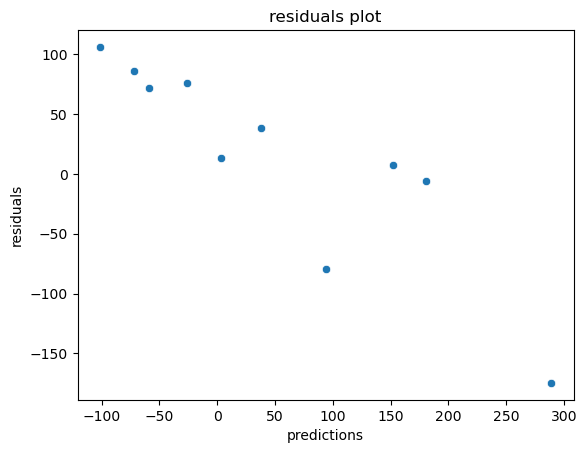

In [47]:
#plot residuals
linreg_residuals2 = y2_test - y2_pred
sns.scatterplot(x = y2_pred, y = linreg_residuals2)
plt.title('residuals plot')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

Linear equation to report model:

total_assets = (0.0222308) * pop_served

In [48]:
#What is your prediction for total assets for an airline, given they serve 20,300,000 customers?

#convert 20,300,000 to 20,300 since the number in pop_served is supposed to be converted to thousands 
total_asset_pred = (0.0222308) * 20300

print('total asset prediction based on 20,300,000 customers:', total_asset_pred)

total asset prediction based on 20,300,000 customers: 451.28524


# Problem 2
Use the gradient descent algorithm to predict the optimal intercept and gradient for this problem. Report your gradient values.

In [53]:
kangaroo_data = pd.read_excel('Assignment 2—Problem 2_ kangaroo’s nasal dimension data.xls', engine = 'xlrd')
kangaroo_data.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


In [54]:
len(kangaroo_data)

45

In [60]:
#defining data
X = kangaroo_data[['X']]
y = kangaroo_data['Y']

#initializing parameters
intercept = 0
gradient = 0 
learning_rate = 0.0001
iterations = 100

#determine cost function based on mean squared error formula
def calculate_cost(X, y, intercept, gradient):
    pred_values = intercept + gradient * X
    return np.mean((y - pred_values) ** 2)


#gradient descent operation
for i in range(iterations):
    grad_intercept = -2 * np.mean(y - (intercept + gradient * X.values.flatten()))
    grad_gradient = -2 * np.mean((y - (intercept + gradient * X.values.flatten())) * X.values.flatten())
    
    #subtract and assign in one step
    intercept -= learning_rate * grad_intercept
    gradient -= learning_rate * grad_gradient
    
print('best intercept:', intercept)
print('best gradient:', gradient)

best intercept: -3.6269011709497196e+194
best gradient: -2.537394764134362e+197
